In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

In [5]:
data={'State':['2Σ1/2', '2Σ1/2','2П1/2', '2П1/2','2П3/2'],
     'Component':['A$_{||}$','A$_{\perp}$','A$_{||}$','A$_{\perp}$','A$_{||}$'],
     'Basis quality':[0.625499266230306,0.474117093176759,10.1392731657295,77.975523688392,22.9382843213562],
     'Core-correlating \n functions':[0.106016824784798,0.106676345964771,0.605932659306543,0.516394196611867,0.732072903873069],
     'Diffuse functions':[0.074211777349358,0.071117563976514,1.50809906316295,2.06557678644747,2.19621871161921],
      'Virtual cutoff':[0.02120336495696,0.023705854658838,0,0,0],
      'Higher excitations':[2.17334490808835,1.86090959071878,4.16073759390493,4.64754776950681,4.75847387517495]
     }
df=pd.DataFrame(data)
display(df)

State    Component  Basis quality  Core-correlating \n functions  \
0  2Σ1/2     A$_{||}$       0.625499                       0.106017   
1  2Σ1/2  A$_{\perp}$       0.474117                       0.106676   
2  2П1/2     A$_{||}$      10.139273                       0.605933   
3  2П1/2  A$_{\perp}$      77.975524                       0.516394   
4  2П3/2     A$_{||}$      22.938284                       0.732073   

   Diffuse functions  Virtual cutoff  Higher excitations  
0           0.074212        0.021203            2.173345  
1           0.071118        0.023706            1.860910  
2           1.508099        0.000000            4.160738  
3           2.065577        0.000000            4.647548  
4           2.196219        0.000000            4.758474

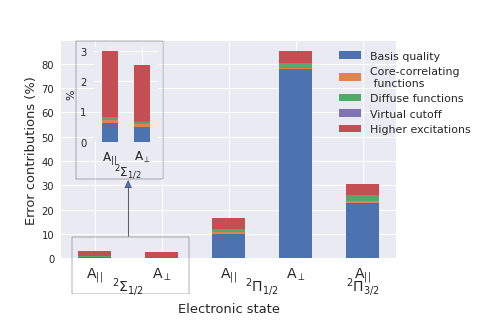

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
overax = fig.add_axes([0,0,1,1])
overax.patch.set_alpha(0)
overax.axis("off")
colours=np.array(sns.color_palette("deep"))
colours[[3,4]]=colours[[4,3]]
plt.style.use('seaborn')
df.set_index(['State','Component']).plot(kind='bar', stacked=True,ax=ax, color=colours)
ax2=plt.axes([0.2, 0.53, .15, .33])
df[df['State']=='2Σ1/2'].set_index(['State','Component']).plot(kind='bar', stacked=True,ax=ax2, legend=False, color=colours)
# ax2.set_title('zoom')
ax.set_xticklabels(df.Component, rotation=0, fontsize=14)
ax.set_xlabel('Electronic state', fontsize=13)
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('Error contributions (%)',fontsize=13)
ax.text(0.2, -0.15, '$^2$\u03A3$_{1/2}$', ha='center', transform=ax.transAxes, fontsize=14)
ax.text(0.6, -0.15, '$^2$\u03A0$_{1/2}$', ha='center', transform=ax.transAxes, fontsize=14)
ax.text(0.9, -0.15, '$^2$\u03A0$_{3/2}$', ha='center', transform=ax.transAxes, fontsize=14)
ax.legend(bbox_to_anchor=(0.8, 1), fontsize=11)
ax2.set_xticklabels(df[df['State']=='2Σ1/2'].Component, rotation=0, fontsize=12)
ax2.text(0.2, 0.38, '$^2$\u03A3$_{1/2}$', ha='center', transform=ax.transAxes, fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('%')
overax.add_patch(Rectangle((0.15,0), 0.27,0.2, fill=None, alpha=1))
overax.add_patch(Rectangle((0.16,0.4), 0.20,0.48, fill=None, alpha=1))
#overax.add_patch(Rectangle((0.13,0.4), 0.26,0.48, fill=None, alpha=1))
ax.arrow(0.5,9,0,20, ls='-',head_width=0.1, head_length=3)
plt.style.use('seaborn')
plt.show()
fig.savefig('mhyperrors.pdf',bbox_inches='tight')
fig.savefig('mhyperrors.png',bbox_inches='tight')